# Fitness Tracking

## Mounting the Google Drive
The CSV file used in this project is saved in my google drive so to access it from a notebook my google drive needs to be mounted. When this line of code is ran a Google Drive pop up will appear and you will need to accept the conditions.

In [1]:
# Mount the google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploring the Data
Let's access and view our data. To do this we use the `pd.read_csv` function as the data is stored in a CSV.

`index_col` is a parameter of the `pandas.read_csv` function that specifies which column of the CSV file to use as the row labels of the DataFrame1. If `index_col` is set to 0, it means that the first column of the CSV file will be used as the row labels.

Then we print the first 5 rows using the `head()` function. 5 is the default amount of rows. The number of rows can be changed by passing the specified number within the print function.

In [2]:
# Import pandas, use pd as an alias
import pandas as pd

# Replace 'path/to/data.csv' with the path to your CSV file within your drive.
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/Portfolio/Projects and Notes/Python/Fitness Tracking Project/Fitness_Data.csv')


# Print the first 5 rows of the DataFrame
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


Now let's see some more information about the data

In [3]:
# Print information about the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


Result Explained

The result tells us there are 169 rows and 4 columns:
```
  RangeIndex: 169 entries, 0 to 168
  Data columns (total 4 columns):
```
And the name of each column, with the data type:
```
   #   Column    Non-Null Count  Dtype  
  ---  ------    --------------  -----  
   0   Duration  169 non-null    int64  
   1   Pulse     169 non-null    int64  
   2   Maxpulse  169 non-null    int64  
   3   Calories  164 non-null    float64
```



`describe()` gives statitcics like averages and standard deviations of the data set.

In [4]:
# To get descriptive statistics
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


### Null Values
The `info()` method also tells us how many Non-Null values there are present in each column, and in our data set it seems like there are 164 of 169 Non-Null values in the "Calories" column.

Which means that there are 5 rows with no value at all, in the "Calories" column, for whatever reason. To see this more clearly we use the `isna()` combined with the `sum()` function.

In [5]:
# Checking for missing values
df.isna().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


## Data Cleaning
Data cleaning means fixing bad data in your data set.

Bad data could be:

*   Empty cells
*   Data in wrong format
*   Wrong data
*   Duplicates

### Removing Empty Cells
We know there is 5 empty cells. Depending on the buisness need there are a couple of options for missing values:

* Delete the affected rows
* Replace them with the avg value
* Predictive modeling to estimate missing values based on other variables.

For this example we will delete the values. But remember to speak to your manager before deciding what to do.

In [6]:
# Remove rows where the "Calories" column has NaN values
df_cleaned_1 = df.dropna(subset=['Calories'])

# Display the DataFrame after removing the rows
print(df_cleaned_1)


     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[164 rows x 4 columns]


Notice that the df above now only has 164 rows that means 5 rows have been reomved. What about the data in the wrong format? or duplicates
As our data set is small lets's view it all and look:

In [7]:
# Converting the df to string means we can see the whole dataset
print(df_cleaned_1.to_string())

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
5          60    102       127     300.0
6          60    110       136     374.0
7          45    104       134     253.3
8          30    109       133     195.1
9          60     98       124     269.0
10         60    103       147     329.3
11         60    100       120     250.7
12         60    106       128     345.3
13         60    104       132     379.3
14         60     98       123     275.0
15         60     98       120     215.2
16         60    100       120     300.0
18         60    103       123     323.0
19         45     97       125     243.0
20         60    108       131     364.2
21         45    100       119     282.0
22         60    130       101     300.0
23         45    105       132     246.0
24         60   

### Duplicates
To find duplicates we use the `duplicated()` function. We also create a new df which stores all these dupes so we can see them.

In [8]:
# Identify duplicate rows
duplicates = df_cleaned_1[df_cleaned_1.duplicated()]

# Display the duplicate rows
print(duplicates)


     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


There are 7 duplicates in our data. To remove duplicates, use the `drop_duplicates(`) method.

Remember: Passing the `(inplace = True)` argument will make sure that the method does NOT return a new DataFrame, but it will remove all duplicates from the original DataFrame.

We will be making a new data frame just incase we do anything wrong.

In [9]:
# Remove duplicate rows, keeping the first occurrence
df_cleaned_2 = df_cleaned_1.drop_duplicates()

# Display the DataFrame after removing duplicates
print(df_cleaned_2)



     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[157 rows x 4 columns]


Notice we now have 157 rows as the 7 dupes were now removed.

## Data Analysis

Now the data is cleaned we are able to do some analysis and create some visuals.

### Finding Relationships
To find the correlation between parts of our data we use the `corr()` function. `corr()` is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded.

### Explanation of the Heatmap Creation Code

In this section, we are visualizing the pairwise correlation between different columns of our DataFrame using a heatmap. The heatmap is a graphical representation of the correlation matrix, which allows us to identify the relationships between variables at a glance.

1. **Importing Seaborn**: We begin by importing the `seaborn` library, which provides a high-level interface for creating attractive and informative statistical graphics.

2. **Computing the Correlation Matrix**: Using the `.corr()` method on our DataFrame (`df_cleaned_2`). `corr()` is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded.

3. **Setting Up the Heatmap Figure**: We use `plt.figure()` to set up the size of the figure that will contain our heatmap. The `figsize` parameter can be adjusted to change the size of the plot as needed.

4. **Creating the Heatmap**: The `sns.heatmap()` function is used to generate the heatmap:
   - `correlation_matrix` is passed as the data source.
   - `annot=True` adds the correlation coefficient values directly onto the heatmap for easy reference.
   - `cmap='coolwarm'` sets the color scheme, making it easy to distinguish between positive and negative correlations.
   - `fmt=".2f"` formats the annotations to two decimal places.
   - `vmin=-0.2` and `vmax=1` specify the minimum and maximum values for the color scale, ensuring that the color bar includes these values for better visual comparison.

5. **Adding Titles and Labels**: We add a title and axis labels to our heatmap using `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`, providing context and making the plot more readable.

6. **Displaying the Heatmap**: Finally, we call `plt.show()` to render and display the heatmap in the notebook.

This heatmap provides a quick and visually appealing way to analyze the correlations between variables, helping to identify potential relationships or patterns in the data.


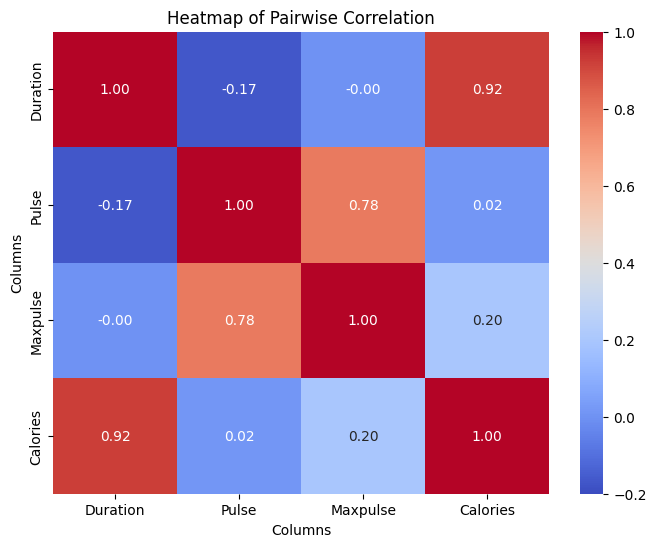

In [10]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt  # This gives us specific tools for plotting.
# Printing a matrix of pairwise corelation of the relationships between columns
correlation_matrix = df_cleaned_2.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",vmin=-0.2, vmax=1)

# Set title and labels
plt.title('Heatmap of Pairwise Correlation')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Display the heatmap
plt.show()


The `print(df.corr())` statement will display a correlation matrix, which is a table showing the correlation coefficients between each pair of numerical columns.  
Values range from -1 to 1:
  * Positive values indicate a positive relationship (variables tend to increase or decrease together).
  * Negative values indicate a negative relationship (variables tend to move in opposite directions).
  * Values closer to 1 or -1 indicate stronger relationships.
  * Values closer to 0 indicate weaker relationships.

### Perfect Correlation:

We can see that "Duration" and "Duration" got the number 1.000000, which makes sense, each column always has a perfect relationship with itself.

### Good Correlation:

"Duration" and "Calories" got a 0.922721 correlation, which is a very good correlation, and we can predict that the longer you work out, the more calories you burn, and the other way around: if you burned a lot of calories, you probably had a long work out.

### Bad Correlation:

"Duration" and "Maxpulse" got a 0.009403 correlation, which is a very bad correlation, meaning that we can not predict the max pulse by just looking at the duration of the work out, and vice versa.

## Data Visualisations
Pandas uses the `plot()` method to create diagrams.
We can use `pyplot`, a submodule of the Matplotlib library to visualize the data. Read more about Matplotlib at [Matplotlib Tutorial](https://www.w3schools.com/python/matplotlib_intro.asp).

### Scatter Graphs

**Purpose:**
This code visualizes the relationship between 'Duration' and 'Calories' in the 'data.csv' file through a scatter plot. We know from earlier that they have a strong corelation.
1. **Import Libraries:**
   - `pandas` is imported for working with data in a structured format (DataFrames).
   - `matplotlib.pyplot` is imported for creating visualizations.

2. **%Matplotlib inline:**  
`%Matplotlib inline` is a backend command in Jupyter Notebooks that enables the rendering of Matplotlib plots directly below code cells. This means that when you execute code that generates Matplotlib plots, the plots are displayed inline within the notebook, rather than in a separate window or output cell.

3. **Create Scatter Plot:**  
`df.plot(kind='scatter', x='Duration', y='Calories')` creates a scatter plot using the DataFrame's data:
     - `kind='scatter'` specifies a scatter plot as the desired plot type.
     - `x='Duration'` sets the 'Duration' column as the data for the x-axis.
     - `y='Calories'` sets the 'Calories' column as the data for the y-axis.

4. **Display Plot:**  
* `plt.title('Relationship Between Duration and Calories')` Adds a title to the graph.
* `plt.xlabel('Duration')` Labels the x-axis Duration.
* `plt.ylabel('Calories')` Labels the y-axis Calories.
* `plt.show()` displays the created scatter plot, making it visible to the user.



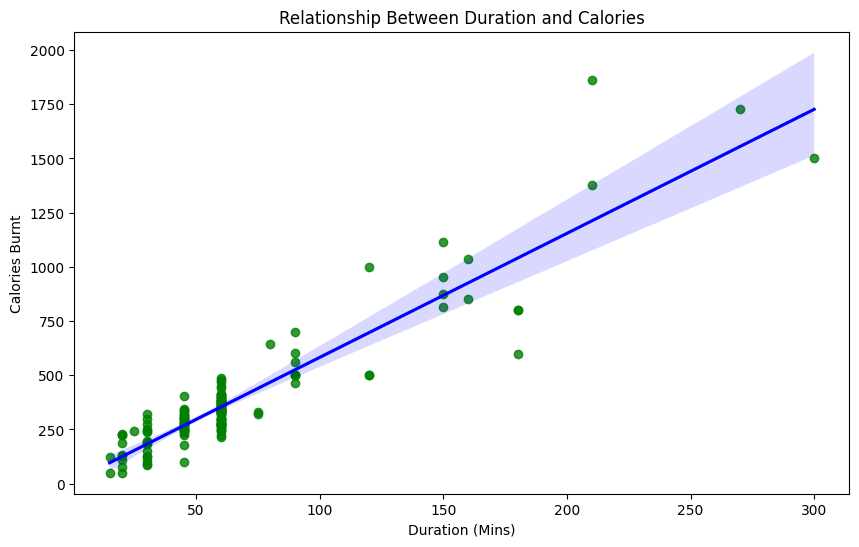

In [11]:
# 1. Gathering the tools for drawing and data:
import sys       # This helps with sending information out, like a messenger.
import matplotlib  # This is the main library for creating plots and charts.
matplotlib.use('Agg')  # This sets a drawing style that works in different environments.
# Bringing in .pyplot:

# 2. This command ensures that plots are rendered inline within the notebook.
%matplotlib inline

# 3. Create a scatter plot with a regression line using seaborn:
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the plot
sns.regplot(x='Duration', y='Calories', data=df_cleaned_2, scatter_kws={'color': 'Green'}, line_kws={'color': 'Blue'})

# 4. Customize and display the plot
plt.title('Relationship Between Duration and Calories')  # Add a title
plt.xlabel('Duration (Mins)')  # Label the x-axis
plt.ylabel('Calories Burnt')  # Label the y-axis
plt.show()


Now to demonstrate a scatter graph with data that has no corelation. From earlier "Pulse" and "Duration" had a really low corelation coefficeint of 0.009403. Notice this time the libraries don't need to be imported as they already have been in the previous code.

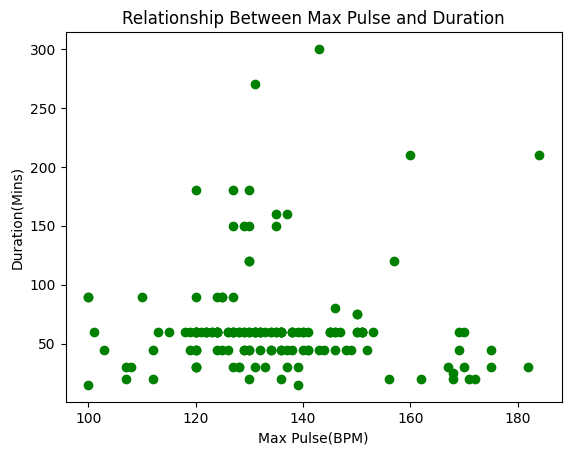

In [12]:
# Create a scatter plot:
# - Use 'Duration' as the x-axis - Use 'Pulse' as the y-axis
plt.scatter(df_cleaned_2['Maxpulse'], df_cleaned_2['Duration'], color='green')  # Change color to green

# Customise and display the plot
plt.title('Relationship Between Max Pulse and Duration')  # Add a title
plt.xlabel('Max Pulse(BPM)')  # Label the x-axis
plt.ylabel('Duration(Mins)')  # Label the y-axis
plt.show()

### Histograms

To make a histogram the `kind` arguemnt is changed to `hist` rather than `scatter`. A histogram needs only one column. A histogram shows us the frequency of each interval.  

**Explanation of histogram code:**  
1. **Creating the Histogram:**  
`df_cleaned_2["Duration"].plot(kind='hist', edgecolor='black')` creates a histogram of the "Duration" column and formats each bar to have a black border.

2. **Setting x-axis Ticks:**  
`plt.xticks(range(0, int(df_cleaned_2["Duration"].max()) + 20, 20)):`
  * `range(start, stop, step)` generates the tick locations.
  * `start` is 0 (the beginning of the range).
  * `stop` is the maximum value in the "Duration" column plus 20, ensuring that ticks cover the entire range of the data.
  * `step` is 20, which sets the interval between ticks.
3. **Displaying the Plot:** plt.show() renders and displays the plot.

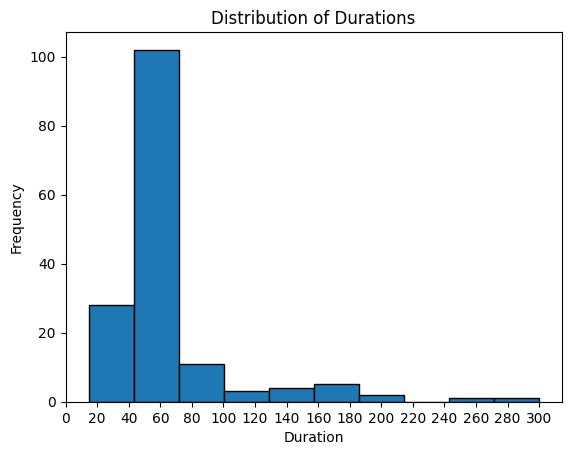

In [13]:
# Create a histogram of the "Duration" column:
df_cleaned_2["Duration"].plot(kind='hist', edgecolor='black')  # Create a histogram

# Customize the plot (optional):
plt.title('Distribution of Durations')  # Add a title
plt.xlabel('Duration')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Set x-axis ticks to be every 20 units
plt.xticks(range(0, int(df_cleaned_2["Duration"].max()) + 20, 20))

# Display the plot:
plt.show()

This histogram tells us that there were over 100 workouts that lasted between 50-60 mins. Let's explore the distribution of "Calories"

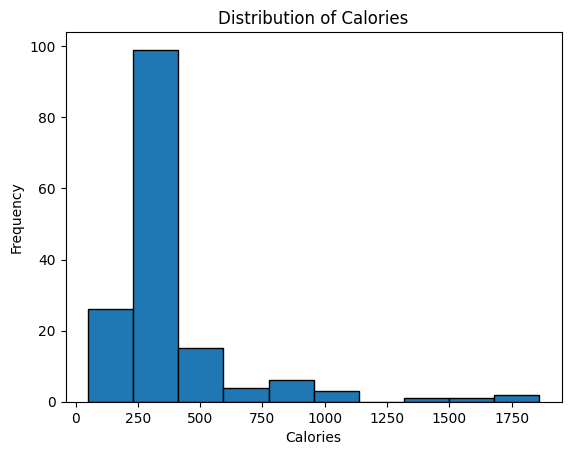

In [14]:
# Create a histogram of the "Duration" column:
df_cleaned_2["Calories"].plot(kind='hist', edgecolor='black')  # Create a histogram

# Customize the plot (optional):
plt.title('Distribution of Calories')  # Add a title
plt.xlabel('Calories')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis

# Display the plot:
plt.show()

Just under 100 workouts burnt between around 220-380 calories.
### Box and Whisker Plots
The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box to the farthest data point.

**Explanation of the Box and Whisker code:**
1. **Set Up the Figure and Subplots:** We create a figure with three subplots arranged in a single row. This is achieved using the subplots function, where `1, 3` indicates one row and three columns, and `figsize` sets the size of the figure.

2. **Define Customizations:**
`colors`: A list of colors for the boxes in each plot.  
`median_color`: A contrasting color for the median line in the boxplots.  
`grid_style`: A dictionary defining the style of the grid lines, making them faint and dashed for a subtle background reference.

3. **First Boxplot for Calories:**
* We create a boxplot for the "Calories" column.
* The plot is customized with the specified face color and median line color.
* Grid lines are added for easier interpretation.
* Y-axis ticks are set to range from 0 to the maximum value of "Calories," with intervals of 100.

4. **Second Boxplot for Pulse:**
* We create a boxplot for the "Pulse" column.
* Similar customizations are applied for the face color and median line.
* Grid lines are included, but the y-axis ticks are left at their default intervals for this plot.

5. **Third Boxplot for Maxpulse:**
* A boxplot is created for the "Maxpulse" column with the specified customizations.
* The y-axis ticks are specifically set to start at 90 and increment by 10, providing a focused view on the relevant data range.

6. **Layout and Display:**
* `plt.tight_layout()` is called to adjust the spacing between plots, ensuring there is no overlap and everything fits neatly.
* Finally, `plt.show()` is used to display the plots.

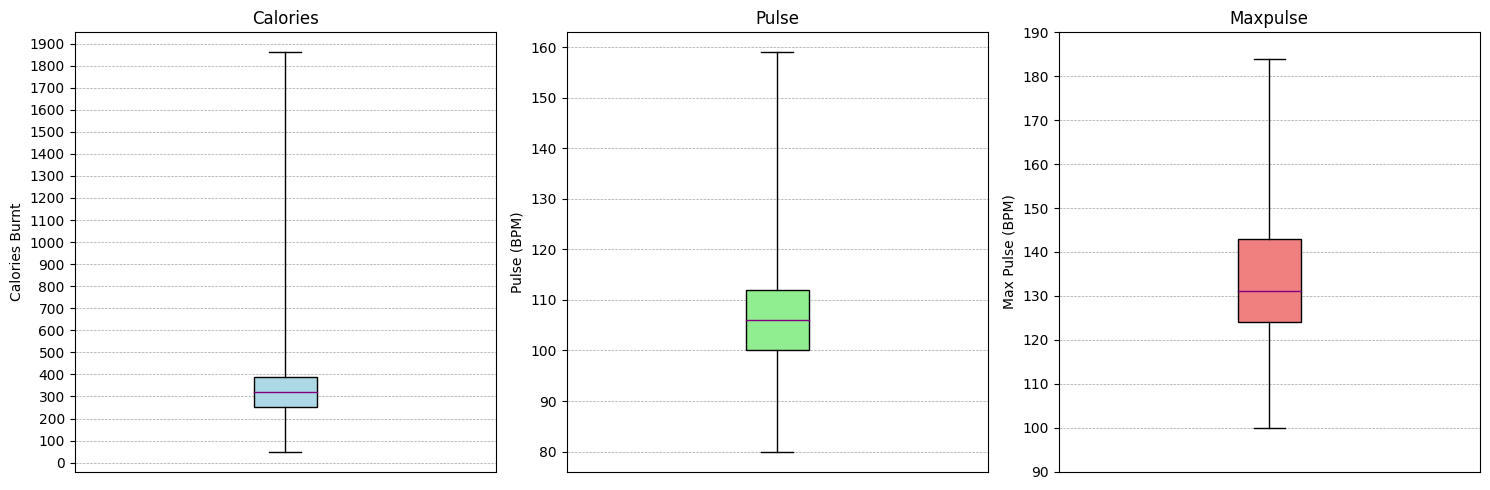

In [15]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define colors for each boxplot
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Define a contrasting color for the median line
median_color = 'purple'

# Define grid line style
grid_style = {'linestyle': '--', 'linewidth': 0.5, 'color': 'gray', 'alpha': 0.7}

# First boxplot for "Calories"
bp1 = axes[0].boxplot(df_cleaned_2['Calories'].dropna(), patch_artist=True, whis=[0, 100], medianprops={'color': median_color})
axes[0].set_title('Calories')
axes[0].set_ylabel('Calories Burnt')  # Custom y-axis label
axes[0].grid(**grid_style)  # Add faint grid lines to the first plot
axes[0].set_yticks(range(0, int(df_cleaned_2['Calories'].max()) + 100, 100))  # Set y-axis ticks every 100

# Color the boxes
for patch in bp1['boxes']:
    patch.set_facecolor(colors[0])  # Set the color for the first boxplot

# Remove x-axis labels
axes[0].set_xticks([])  # Remove x-axis ticks

# Second boxplot for "Pulse"
bp2 = axes[1].boxplot(df_cleaned_2['Pulse'].dropna(), patch_artist=True, whis=[0, 100], medianprops={'color': median_color})
axes[1].set_title('Pulse')
axes[1].set_ylabel('Pulse (BPM)')  # Custom y-axis label
axes[1].grid(**grid_style)  # Add faint grid lines to the second plot

# Color the boxes
for patch in bp2['boxes']:
    patch.set_facecolor(colors[1])  # Set the color for the second boxplot

# Remove x-axis labels
axes[1].set_xticks([])  # Remove x-axis ticks

# Third boxplot for "Maxpulse"
bp3 = axes[2].boxplot(df_cleaned_2['Maxpulse'].dropna(), patch_artist=True, whis=[0, 100], medianprops={'color': median_color})
axes[2].set_title('Maxpulse')
axes[2].set_ylabel('Max Pulse (BPM)')  # Custom y-axis label
axes[2].grid(**grid_style)  # Add faint grid lines to the third plot
axes[2].set_yticks(range(90, int(df_cleaned_2['Maxpulse'].max()) + 10, 10))  # Set y-axis ticks every 10 starting at 90

# Color the boxes
for patch in bp3['boxes']:
    patch.set_facecolor(colors[2])  # Set the color for the third boxplot

# Remove x-axis labels
axes[2].set_xticks([])  # Remove x-axis ticks

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
